In [18]:
import pandas as pd
import numpy as np

# load the dataset
data_df = pd.read_csv('data.csv')

In [19]:
# Handle missing values in Calories
data_df['Calories'] = data_df.groupby('Duration')['Calories'].transform(lambda x: x.fillna(x.median()))
data_df['Calories'] =data_df['Calories'].fillna(data_df['Calories'].median())

In [20]:
# Fix inconsistent values where Maxpulse should be less than Pulse
less_than = data_df['Maxpulse'] < data_df['Pulse']
data_df.loc[less_than, 'Maxpulse'] = data_df.loc[less_than, 'Maxpulse'] + 10

In [21]:
# Clipping
data_df['Duration'] = data_df['Duration'].clip(upper=300)
data_df['Pulse'] = data_df['Pulse'].clip(lower=70, upper=200)
data_df['Maxpulse'] = data_df['Maxpulse'].clip(lower=70, upper=200)

In [22]:
# Clipping Calories based on the duration
data_df['Calories'] = data_df['Calories'].clip(
    lower=data_df['Duration'] * 4,
    upper=data_df['Duration'] * 12
)

In [23]:
# Removing duplicates
data_df = data_df.drop_duplicates()

In [24]:
data_df.to_csv('data_cleaned.csv', index=False)

print(data_df.shape)
print('statistical summary')
print(data_df.describe())

(162, 4)
statistical summary
         Duration       Pulse    Maxpulse     Calories
count  162.000000  162.000000  162.000000   162.000000
mean    64.197531  107.709877  134.388889   379.598148
std     43.151882   14.711588   16.264220   266.813815
min     15.000000   80.000000  100.000000    60.000000
25%     45.000000  100.000000  124.000000   255.075000
50%     60.000000  105.500000  131.000000   320.700000
75%     60.000000  111.000000  141.000000   386.700000
max    300.000000  159.000000  184.000000  1860.400000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

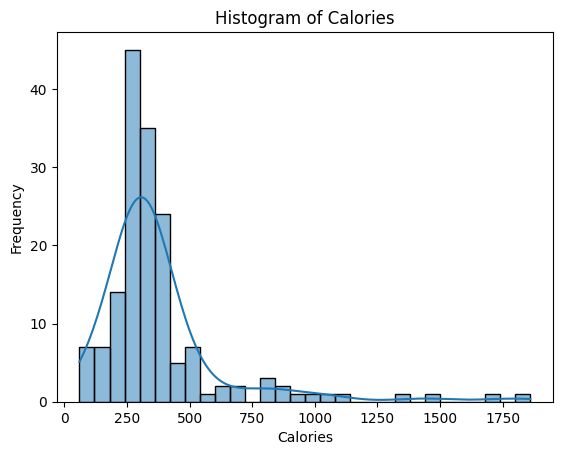

In [27]:
# Histogram for Calories
sb.histplot(data_df['Calories'], bins=30, kde=True)
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

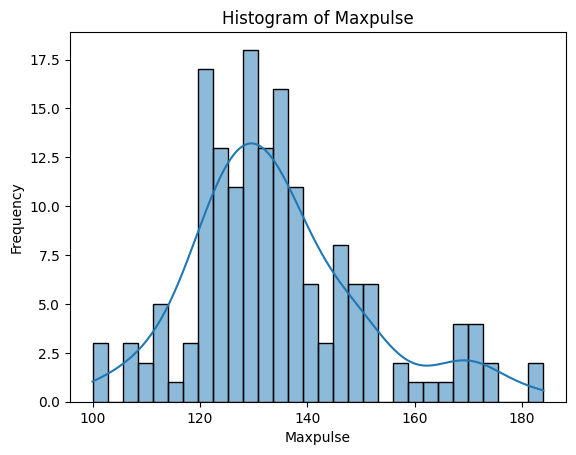

In [28]:
# Histogram for Maxpulse
sb.histplot(data_df['Maxpulse'], bins=30, kde=True)
plt.title('Histogram of Maxpulse')
plt.xlabel('Maxpulse')
plt.ylabel('Frequency')